# Clustering for mental health:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-633ad582454a>:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,2,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,2,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0


In [8]:
from sklearn.metrics import silhouette_score
# Define the score function
def clustering_score(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) == 1:
        return 0.0
    else:
        return silhouette_score(X, labels)

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import BallTree
import numpy as np

features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
            'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
            'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
            '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(daf)

# Split data into training and testing sets using cross-validation sampling
X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)

# Use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Compute nearest neighbors using ball tree
tree = BallTree(X_pca)
min_samples = 10
dist, _ = tree.query(X_pca, min_samples)



In [13]:
# Find a suitable epsilon value
knn_distances = np.sort(dist, axis=0)[:, -1]
eps = np.mean(knn_distances)

In [14]:
# Set up the parameter grid for DBSCAN
param_grid = {'eps': np.linspace(0.1, 1.0, 10),
              'min_samples': np.arange(5, 20)
}

In [15]:
# Create the RandomizedSearchCV object with the custom score function
dbscan = DBSCAN()
dbscan_random = RandomizedSearchCV(dbscan, param_grid, scoring=clustering_score, n_iter=100, cv=5, random_state=42)



In [ ]:
# Fit the model and print the best parameters and score
dbscan_random.fit(X_pca)
print('Best parameters:', dbscan_random.best_params_)
print('Best score:', dbscan_random.best_score_)


Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

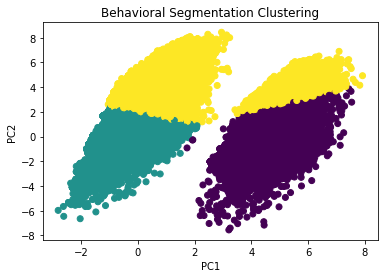

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline


features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
            'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
            'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
            '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std() 

# Define the PCA and clustering pipeline
pca_kmeans_pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('kmeans', MiniBatchKMeans(n_clusters=3, init='k-means++', random_state=42))
])

# Fit the pipeline to the standardized data
kmeans_model = pca_kmeans_pipeline.fit_predict(df_std)
# Visualize the clusters
plt.scatter(pca_kmeans_pipeline.named_steps['pca'].transform(df_std)[:, 0],
            pca_kmeans_pipeline.named_steps['pca'].transform(df_std)[:, 1],
            c=kmeans_model, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmeans_model)
kmeans_calinski = calinski_harabasz_score(daf, kmeans_model)
kmeans_davies = davies_bouldin_score(daf, kmeans_model)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  21508.62988258449
KMeans - Davies-Bouldin Index:  3.5792976800787124


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import BallTree
import numpy as np

features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
            'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
            'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
            '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

#sample_size = 50000
#df_sample = daf.sample(n=sample_size, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(daf)

# Split data into training and testing sets using cross-validation sampling
X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)

# Use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [18]:
# Compute nearest neighbors using ball tree
tree = BallTree(X_pca)
min_samples = 10
dist, _ = tree.query(X_pca, min_samples)


In [19]:
# Find a suitable epsilon value
knn_distances = np.sort(dist, axis=0)[:, -1]
eps = np.mean(knn_distances)

In [20]:
# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model = dbscan.fit_predict(X_pca)

In [21]:
# Evaluate the clustering results
n_clusters = len(set(dbscan_model)) - (1 if -1 in dbscan_model else 0)
n_noise = list(dbscan_model).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4795
Estimated number of noise points: 119508


In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#dbscan_silhouette = silhouette_score(daf, dbscan.labels_)
dbscan_calinski = calinski_harabasz_score(daf, dbscan.labels_)
dbscan_davies = davies_bouldin_score(daf, dbscan.labels_)

#print("dbscan - Silhouette Coefficient: ", dbscan_silhouette)
print("dbscan - Calinski-Harabasz Index: ", dbscan_calinski)
print("dbscan - Davies-Bouldin Index: ", dbscan_davies)

dbscan - Calinski-Harabasz Index:  43.97374790730895
dbscan - Davies-Bouldin Index:  10.466959892147619


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import pairwise_distances


features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
       'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
       '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(daf)

# Split data into training and testing sets using cross-validation sampling
X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)

# Use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Compute a distance matrix
dist = pairwise_distances(X_scaled)

# Find a suitable epsilon value
min_samples = 10
knn_distances = np.sort(dist, axis=0)[:, min_samples]
knn_distances = knn_distances[knn_distances != 0]
eps = np.mean(knn_distances)

# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model = dbscan.fit_predict(X_scaled)

# Evaluate the clustering results
n_clusters = len(set(dbscan_model)) - (1 if -1 in dbscan_model else 0)
n_noise = list(dbscan_model).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

MemoryError: Unable to allocate 1.42 TiB for an array with shape (441456, 441456) and data type float64

The first experiment was to work with dbscan algorithm but it was very consumming when it comes to computation so i had to optimise using Ball Tree to search for the nearest neighbors and i got a large number of clusters which is 4795, so i decided to work with a random sample. However we still got a large number of clusters which is not logical (246 clusters)

In [1]:
# Visualize the clustering
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.cm.get_cmap('viridis', n_clusters)

for i in range(n_clusters):
    if i == -1:
        # Black used for noise.
        color = 'k'
    else:
        color = colors(i)
    # Plot the points in each cluster
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=10, c=color, alpha=0.5, label='Cluster {}'.format(i))

plt.title('DBSCAN Clustering of LLCP2015 Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

NameError: name 'dbscan' is not defined

There are many feature selection techniques available, each with their own strengths and weaknesses. Here is an example of using the mutual information feature selection technique to select the most important features for clustering

In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('MENTHLTH', axis=1)
y = df['MENTHLTH']

In [5]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x000002AAB65FD5E0>)

In [6]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
       'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3',
       '_RFSMOK3', 'PHYSHLTH'],
      dtype='object')


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

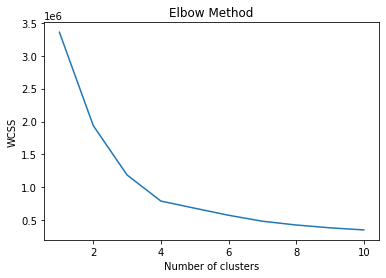

In [17]:
#features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
       'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
       '_RFSMOK3', 'PHYSHLTH']
#features = ['SEX','MARITAL','EDUCA','_INCOMG','_BMI5','_AGEG5YR','GENHLTH','EXERANY2','MENTHLTH','EXRACT21','ALCDAY5','_RFBING5','FRUIT1','FVGREEN','FVORANG','_FRTLT1','SMOKE100','SMOKDAY2','_SMOKER3','_RFSMOK3','PHYSHLTH']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2','PC3'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

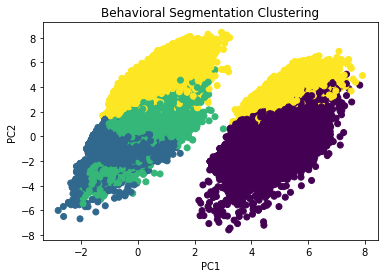

In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmodel = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmodel, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmodel)
kmeans_calinski = calinski_harabasz_score(daf, kmodel)
kmeans_davies = davies_bouldin_score(daf, kmodel)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  25174.75987218409
KMeans - Davies-Bouldin Index:  5.856800299420184


In [26]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
#    cluster = clustered_data.loc[clustered_data['cluster'] == i]
#    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
#    profile.to_file(f"clustering12_{i}_profile.html")

Cluster Sizes:
Cluster 0: 35074
Cluster 1: 89186
Cluster 2: 58477
Cluster 3: 258719

Cluster Means:
          _INCOMG   GENHLTH  EXERANY2  _RFBING5  _RFDRHV5   _VEGLT1    BPMEDS  \
cluster                                                                         
0        3.555255  3.428066  1.345897  1.045105  1.025689  1.211097  1.049752   
1        3.141367  3.491434  1.504765  1.028872  1.009553  1.317202  1.086415   
2        3.412521  2.883920  1.340818  1.230364  1.108162  1.249021  1.099697   
3        4.416479  2.067026  1.117363  1.127466  1.054063  1.117974  1.052377   

         BLOODCHO  CVDINFR4  CVDCRHD4  CVDSTRK3    _MICHD  CHCSCNCR  DIABETE3  \
cluster                                                                         
0        1.069624  1.352968  1.303159  1.846040  1.000000  1.818241  2.354365   
1        1.262967  2.076043  1.996939  1.957202  1.996289  1.902787  2.390891   
2        1.366999  1.985533  1.990783  1.975221  1.947467  1.945927  2.796912   
3       

[1 2 1 ... 1 1 0]


Text(0.5, 0, 'PC1')

Text(0.5, 0, 'PC2')

Text(0.5, 0, 'PC3')

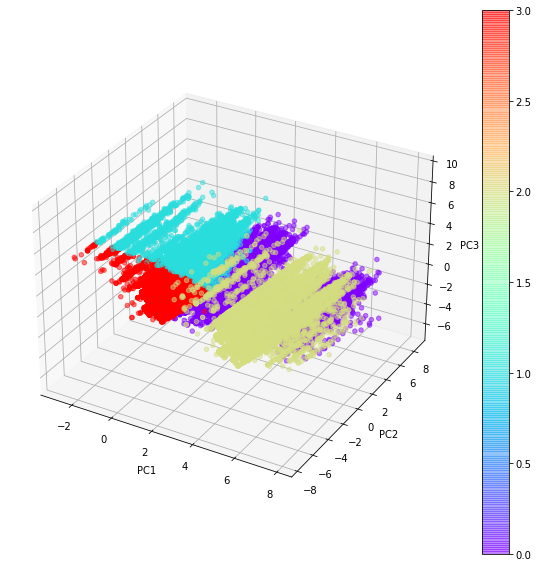

In [27]:
cluster_labels = kmeans.labels_
print(cluster_labels)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=cluster_labels, cmap='rainbow', alpha=0.5)

# Setting labels for the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Adding a colorbar
plt.colorbar(scatter)

# Displaying the plot
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop('MENTHLTH', axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9762492638064604


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

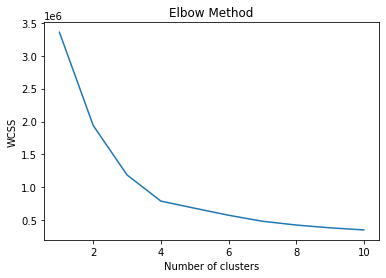

In [20]:
#features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
       'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
       '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2','PC3'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

In [21]:
# Train a KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pca)

In [15]:
df

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,2,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,2,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0


In [16]:
# Identify the cluster with the highest proportion of patients with mental issues
cluster_mental_issues = pd.DataFrame(daf.groupby(kmeans.labels_)['MENTHLTH'].mean())
cluster_mental_issues = cluster_mental_issues.sort_values(by='MENTHLTH', ascending=False).head(1)
mental_issues_cluster_label = cluster_mental_issues.index[0]
#'_BMI5': [2204.0], 'SEX': [1.0], 'MARITAL': [1.0], '_AGEG5YR': [2.0], 'EXEROFT1': [103.0], 'MAXDRNKS' :[2.0],'SMOKDAY2' :[1.0],'PHYSHLTH' :[15.0],'VEGETAB1' :[201.0],'FRUIT1' :[101.0],'GENHLTH' :[3.0],'EDUCA' :[5],'_INCOMG' :[2], 'MENTHLTH': [0]
# Make a prediction for a new patient
new_patient = pd.DataFrame({'_INCOMG' :[5], 'GENHLTH':[3.0], 'EXERANY2':[2.0], '_RFBING5':[1], '_RFDRHV5':[1], '_VEGLT1':[2],
       'BPMEDS':[2.0], 'BLOODCHO':[1], 'CVDINFR4':[7], 'CVDCRHD4':[1.0], 'CVDSTRK3':[2], '_MICHD':[1.0],
       'CHCSCNCR':[1.0], 'DIABETE3':[2.0], 'SMOKE100':[2.0], 'SMOKDAY2':[3.0], 'USENOW3':[3.0], '_SMOKER3':[2], 'MENTHLTH':[20],
       '_RFSMOK3':[2], 'PHYSHLTH':[15.0]
       })
new_data_pca = pca.transform(new_patient)
# Predict the cluster label for the new patient
new_patient_cluster = kmeans.predict(new_data_pca)

# Check if the new patient is more likely to develop mental issues based on the identified cluster
if new_patient_cluster == mental_issues_cluster_label:
    print("This patient is more likely to develop mental issues.")
else:
    print("This patient is not more likely to develop mental issues.")

This patient is more likely to develop mental issues.


### Mental Health Risk Prediction:

In [ ]:
# Split data into features (X) and target variable (y)
X = daf.drop('MENTHLTH', axis=1)
y = daf['MENTHLTH']

# Add the cluster labels as a new column to the DataFrame
cluster_labels = kmeans.labels_
daf['cluster'] = cluster_labels


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
# Assuming you have obtained the clusters from the segmentation part
# and stored them in a variable called 'clusters'

# Assuming you have a DataFrame 'df' with the necessary variables for prediction
# X: Input features related to health behavior
# y: Target variable representing a specific health behavior

# Add the cluster labels as a new column to the DataFrame
daf['cluster'] = cluster_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model on the training data
model = SVC()
model.fit(X_train, y_train)

# Predict the health behavior for the test data
predictions = model.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Health Behavior Prediction:

In [ ]:
# Split data into features (X) and target variable (y)
X = daf.drop(['SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
            '_RFSMOK3', 'PHYSHLTH','GENHLTH', 'EXERANY2','_VEGLT1'], axis=1)
y = daf[['SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
            '_RFSMOK3', 'PHYSHLTH','GENHLTH', 'EXERANY2','_VEGLT1']]

# Add the cluster labels as a new column to the DataFrame
cluster_labels = kmeans.labels_
daf['cluster'] = cluster_labels

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train_list, y_test_list = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of y_train_list:", y_train_list.shape)
print("Shape of y_test_list:", y_test_list.shape)

In [ ]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train separate logistic regression models for each target feature
sv_models = {}
predicted_risk_scores = {}

for feature in y.columns:
    sv = SVC()
    sv.fit(X_train, y_train[feature])
    sv_models[feature] = sv
    predicted_risk_scores[feature] = sv.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each target feature using the same cluster labels
for feature in y.columns:
    daf[f'PredictedRisk_{feature}'] = predicted_risk_scores[feature]

# Calculate the average predicted risk score for each cluster and each target feature
average_risk_scores = {}

for feature in y.columns:
    average_risk_scores[feature] = {}
    for cluster in set(cluster_labels):
        cluster_indices = cluster_labels == cluster
        average_risk_scores[feature][cluster] = predicted_risk_scores[feature][cluster_indices].mean()

# Print the predicted risk scores for each cluster and each target feature
for feature in y.columns:
    for cluster, prediction in average_risk_scores[feature].items():
        print(f"Cluster {cluster}: Predicted risk of {feature} - {prediction:.4f}")